<a href="https://colab.research.google.com/github/titilomt/data_science_puc_projects/blob/master/trabalho_pratico_boosting_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATIVIDADE PRATICA 4

Para este exercicio vamos usar a base de dados [sonar.xlsx](https://github.com/titilomt/data_science_puc_projects/blob/master/csv/sonar.xlsx?raw=true)

A base de dados SONAR foi utilizada por Gorman e Sejnowski, em seu trabalho sobre redes neurais, para classificar sinais de sonar. A tarefa consistia em treinar uma rede neural para diferenciar entre um cilindro de metal – potencial mina terrestre – de uma rocha cilíndrica.

## BOOSTING

Professor: HUGO DE PAULA

Alunos: Tiago Henrique Pereira Fonseca

---
RESUMO DOS DADOS:

1. Cada registro da base possui 60 atributos numéricos entre 0 e 1.0, e uma classe.
2. São 11 padrões para minas e 97 padrões para rocha.

Este trabalho irá comparar o uso de redes neurais e de técnicas de boosting para a classificação de sinais de sonar.

---

### Libs que serão usadas no Trabalho

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
import numpy as np

import matplotlib.pyplot as plt


import pydotplus

### Carregando dados

In [2]:
Sonar = pd.read_excel('https://github.com/titilomt/data_science_puc_projects/blob/master/csv/sonar.xlsx?raw=true', sheet_name=0)

### Análise da Base

In [3]:
print("\nDimensões:\n{0}\n".format(Sonar.shape))
print("\nCampos:\n{0}\n".format(list(Sonar.keys())))
print("\nTipos dos dados:\n")
format(Sonar.info())
print(Sonar.describe().to_string(max_cols=Sonar.shape[1]), sep='\n')



Dimensões:
(208, 61)


Campos:
['Atributo_1_62', 'Atributo_2_63', 'Atributo_3_64', 'Atributo_4_65', 'Atributo_5_66', 'Atributo_6_67', 'Atributo_7_68', 'Atributo_8_69', 'Atributo_9_70', 'Atributo_10_71', 'Atributo_11_72', 'Atributo_12_73', 'Atributo_13_74', 'Atributo_14_75', 'Atributo_15_76', 'Atributo_16_77', 'Atributo_17_78', 'Atributo_18_79', 'Atributo_19_80', 'Atributo_20_81', 'Atributo_21_82', 'Atributo_22_83', 'Atributo_23_84', 'Atributo_24_85', 'Atributo_25_86', 'Atributo_26_87', 'Atributo_27_88', 'Atributo_28_89', 'Atributo_29_90', 'Atributo_30_91', 'Atributo_31_92', 'Atributo_32_93', 'Atributo_33_94', 'Atributo_34_95', 'Atributo_35_96', 'Atributo_36_97', 'Atributo_37_98', 'Atributo_38_99', 'Atributo_39_100', 'Atributo_40_101', 'Atributo_41_102', 'Atributo_42_103', 'Atributo_43_104', 'Atributo_44_105', 'Atributo_45_106', 'Atributo_46_107', 'Atributo_47_108', 'Atributo_48_109', 'Atributo_49_110', 'Atributo_50_111', 'Atributo_51_112', 'Atributo_52_113', 'Atributo_53_114', 'Atribu

### Preparando dados e separando teste de treinamneto

In [4]:
X = Sonar.iloc[:,0:(Sonar.shape[1] - 1)]

le = LabelEncoder()
y = le.fit_transform(Sonar.iloc[:,(Sonar.shape[1] - 1)])

class_names = le.classes_
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)



### ARVORE DE DECISÃO - Tradicional

In [5]:
trad_tree = tree.DecisionTreeClassifier(random_state=20, criterion='gini')
tree_decision = trad_tree.fit(X_train, y_train)
y_pred = tree_decision.predict(X_test)

print("Classificador Árvore de Decisão:\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(tree_decision.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador Árvore de Decisão:

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.80      0.92      0.86        13
       Rocha       0.83      0.62      0.71         8

    accuracy                           0.81        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.81      0.81      0.80        21

       Mina(prev)  Rocha(prev)
Mina           12            1
Rocha           3            5


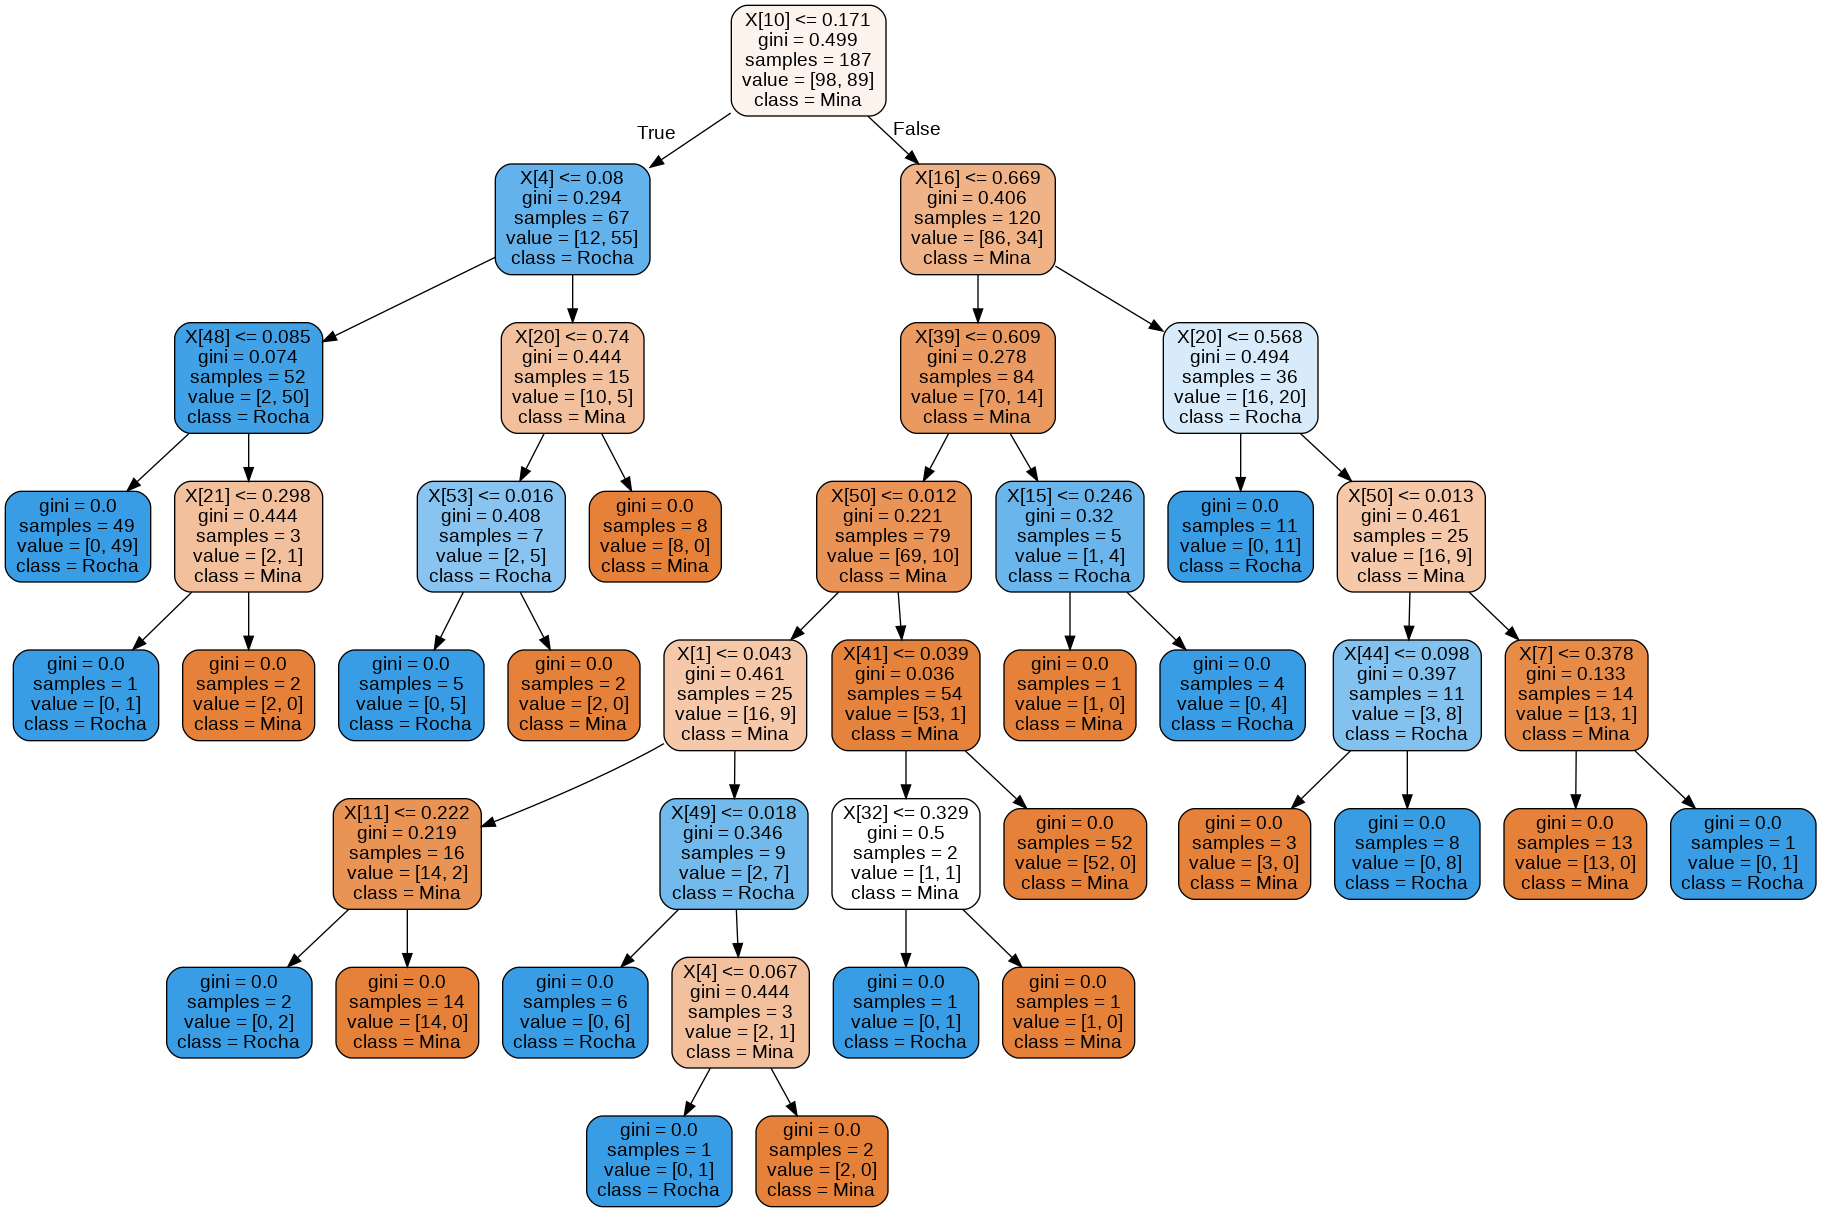

In [6]:
dot_data = tree.export_graphviz(tree_decision, out_file=None, 
                                rounded =True,
                                filled=True,
                                class_names=le.classes_)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

###### FLORESTA RANDOMICA E ARVORES EXTRAS


In [7]:
ranForest = RandomForestClassifier(n_estimators=10,random_state=0, criterion='gini')
ranForest = ranForest.fit(X_train, y_train)
y_pred = ranForest.predict(X_test)

print("Classificador Random Forest:\n RandomForestClassifier(n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ranForest.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador Random Forest:
 RandomForestClassifier(n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 0.99
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.92      0.85      0.88        13
       Rocha       0.78      0.88      0.82         8

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.85        21
weighted avg       0.86      0.86      0.86        21

       Mina(prev)  Rocha(prev)
Mina           11            2
Rocha           1            7


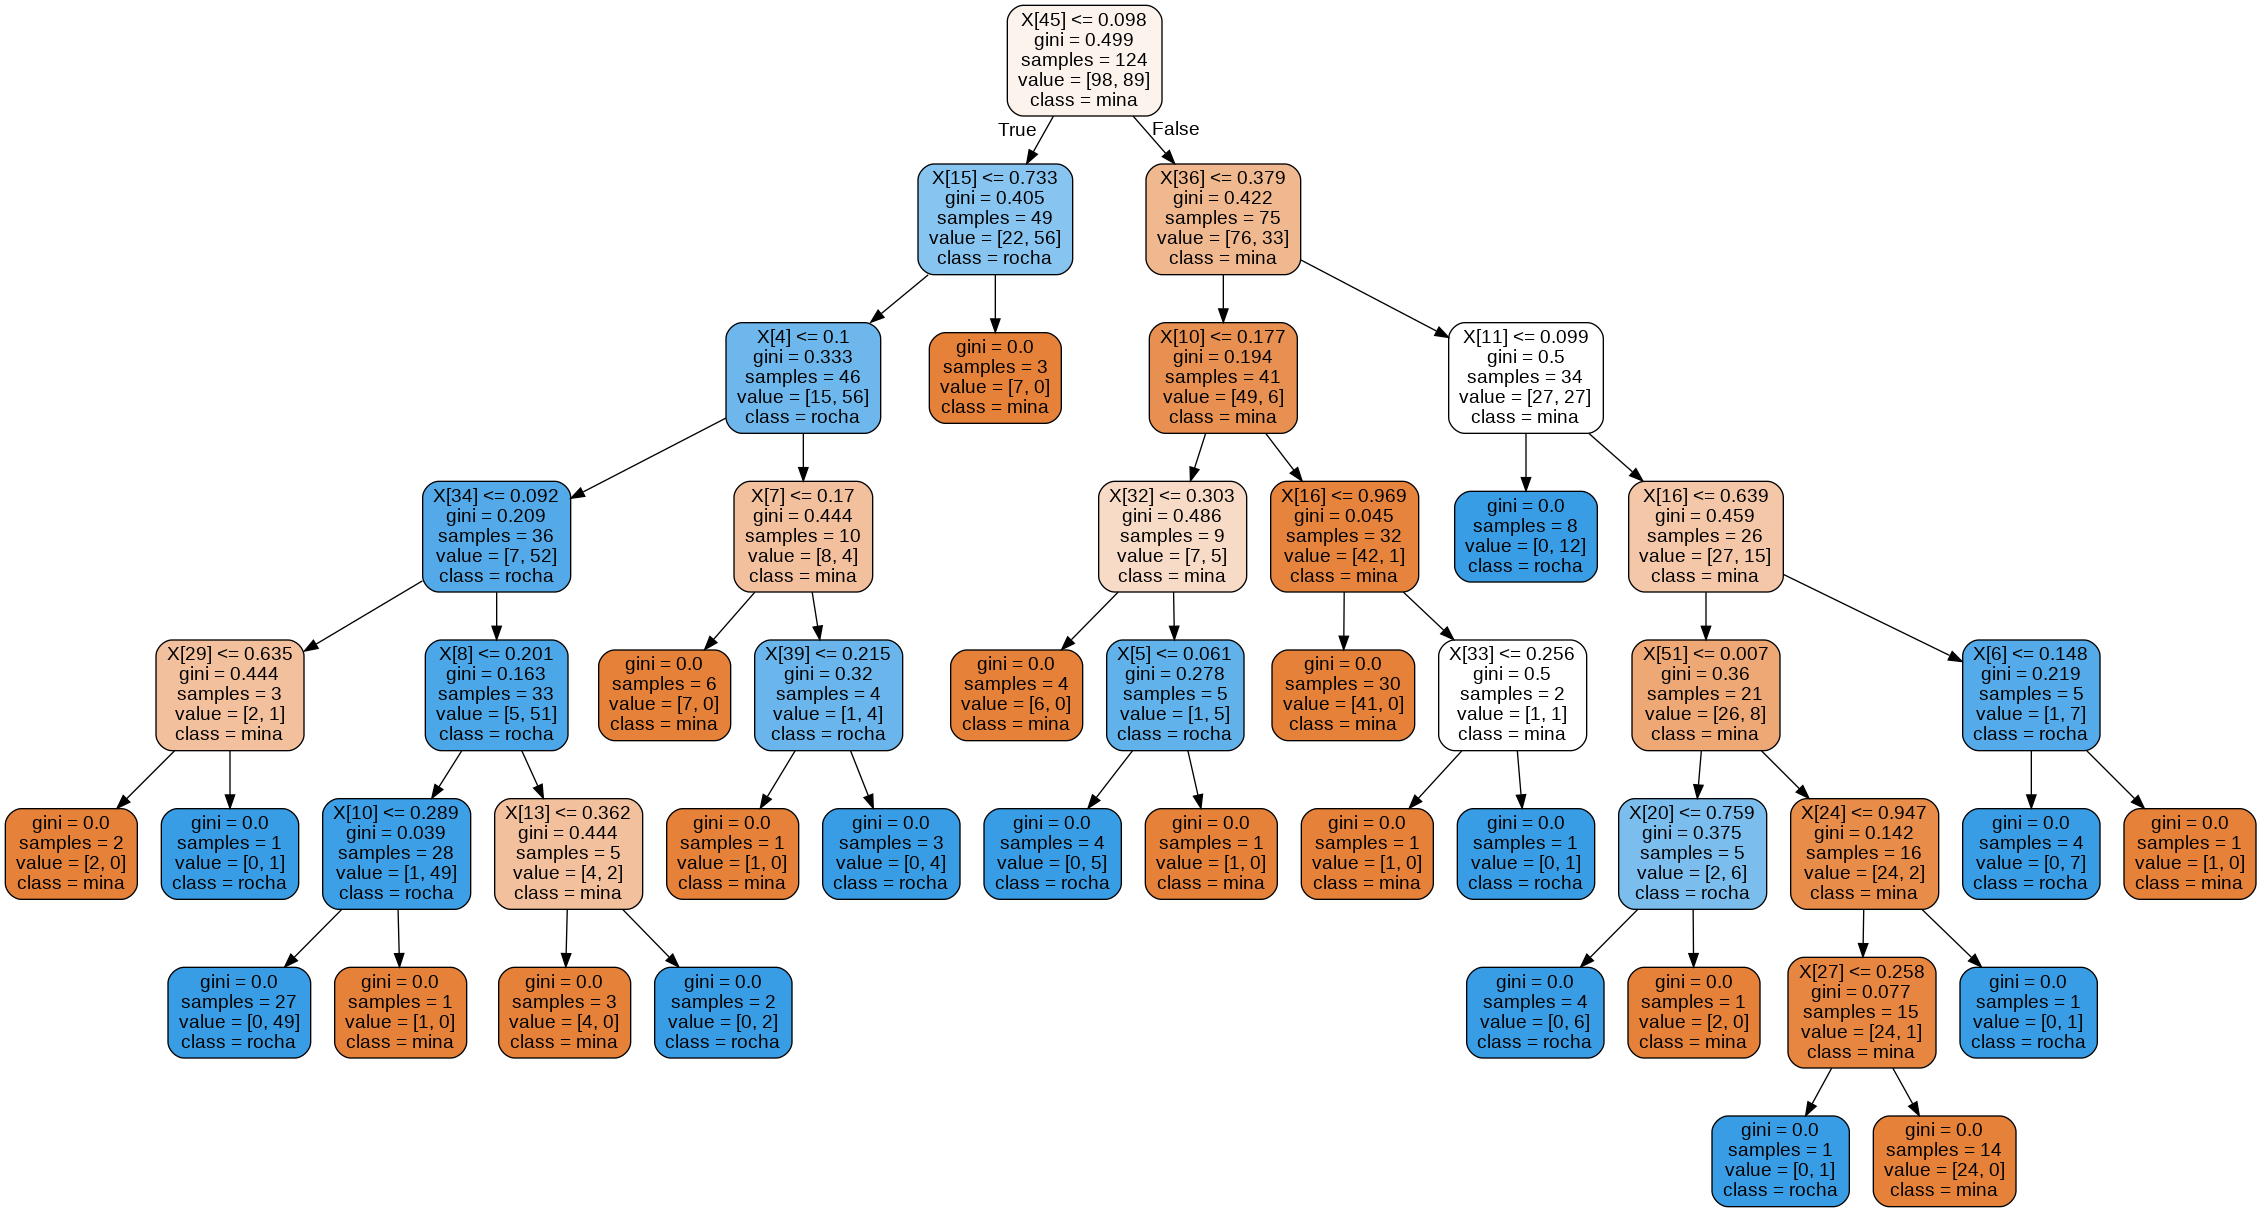

In [8]:
dot_data = tree.export_graphviz(ranForest.estimators_[2], out_file=None, 
                                proportion = False,
                                rounded =True,
                                filled=True,
                                class_names = ['mina','rocha'])

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [9]:

extreeClass = ExtraTreesClassifier(n_estimators=10, random_state=0, criterion="gini")
extreeClass = extreeClass.fit(X_train, y_train)
y_pred = extreeClass.predict(X_test)

print("Classificador Extreme Tree:\n ExtraTreesClassifier(n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(extreeClass.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Classificador Extreme Tree:
 ExtraTreesClassifier(n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
              precision    recall  f1-score   support

        Mina       0.93      1.00      0.96        13
       Rocha       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21

       Mina(prev)  Rocha(prev)
Mina           13            0
Rocha           1            7


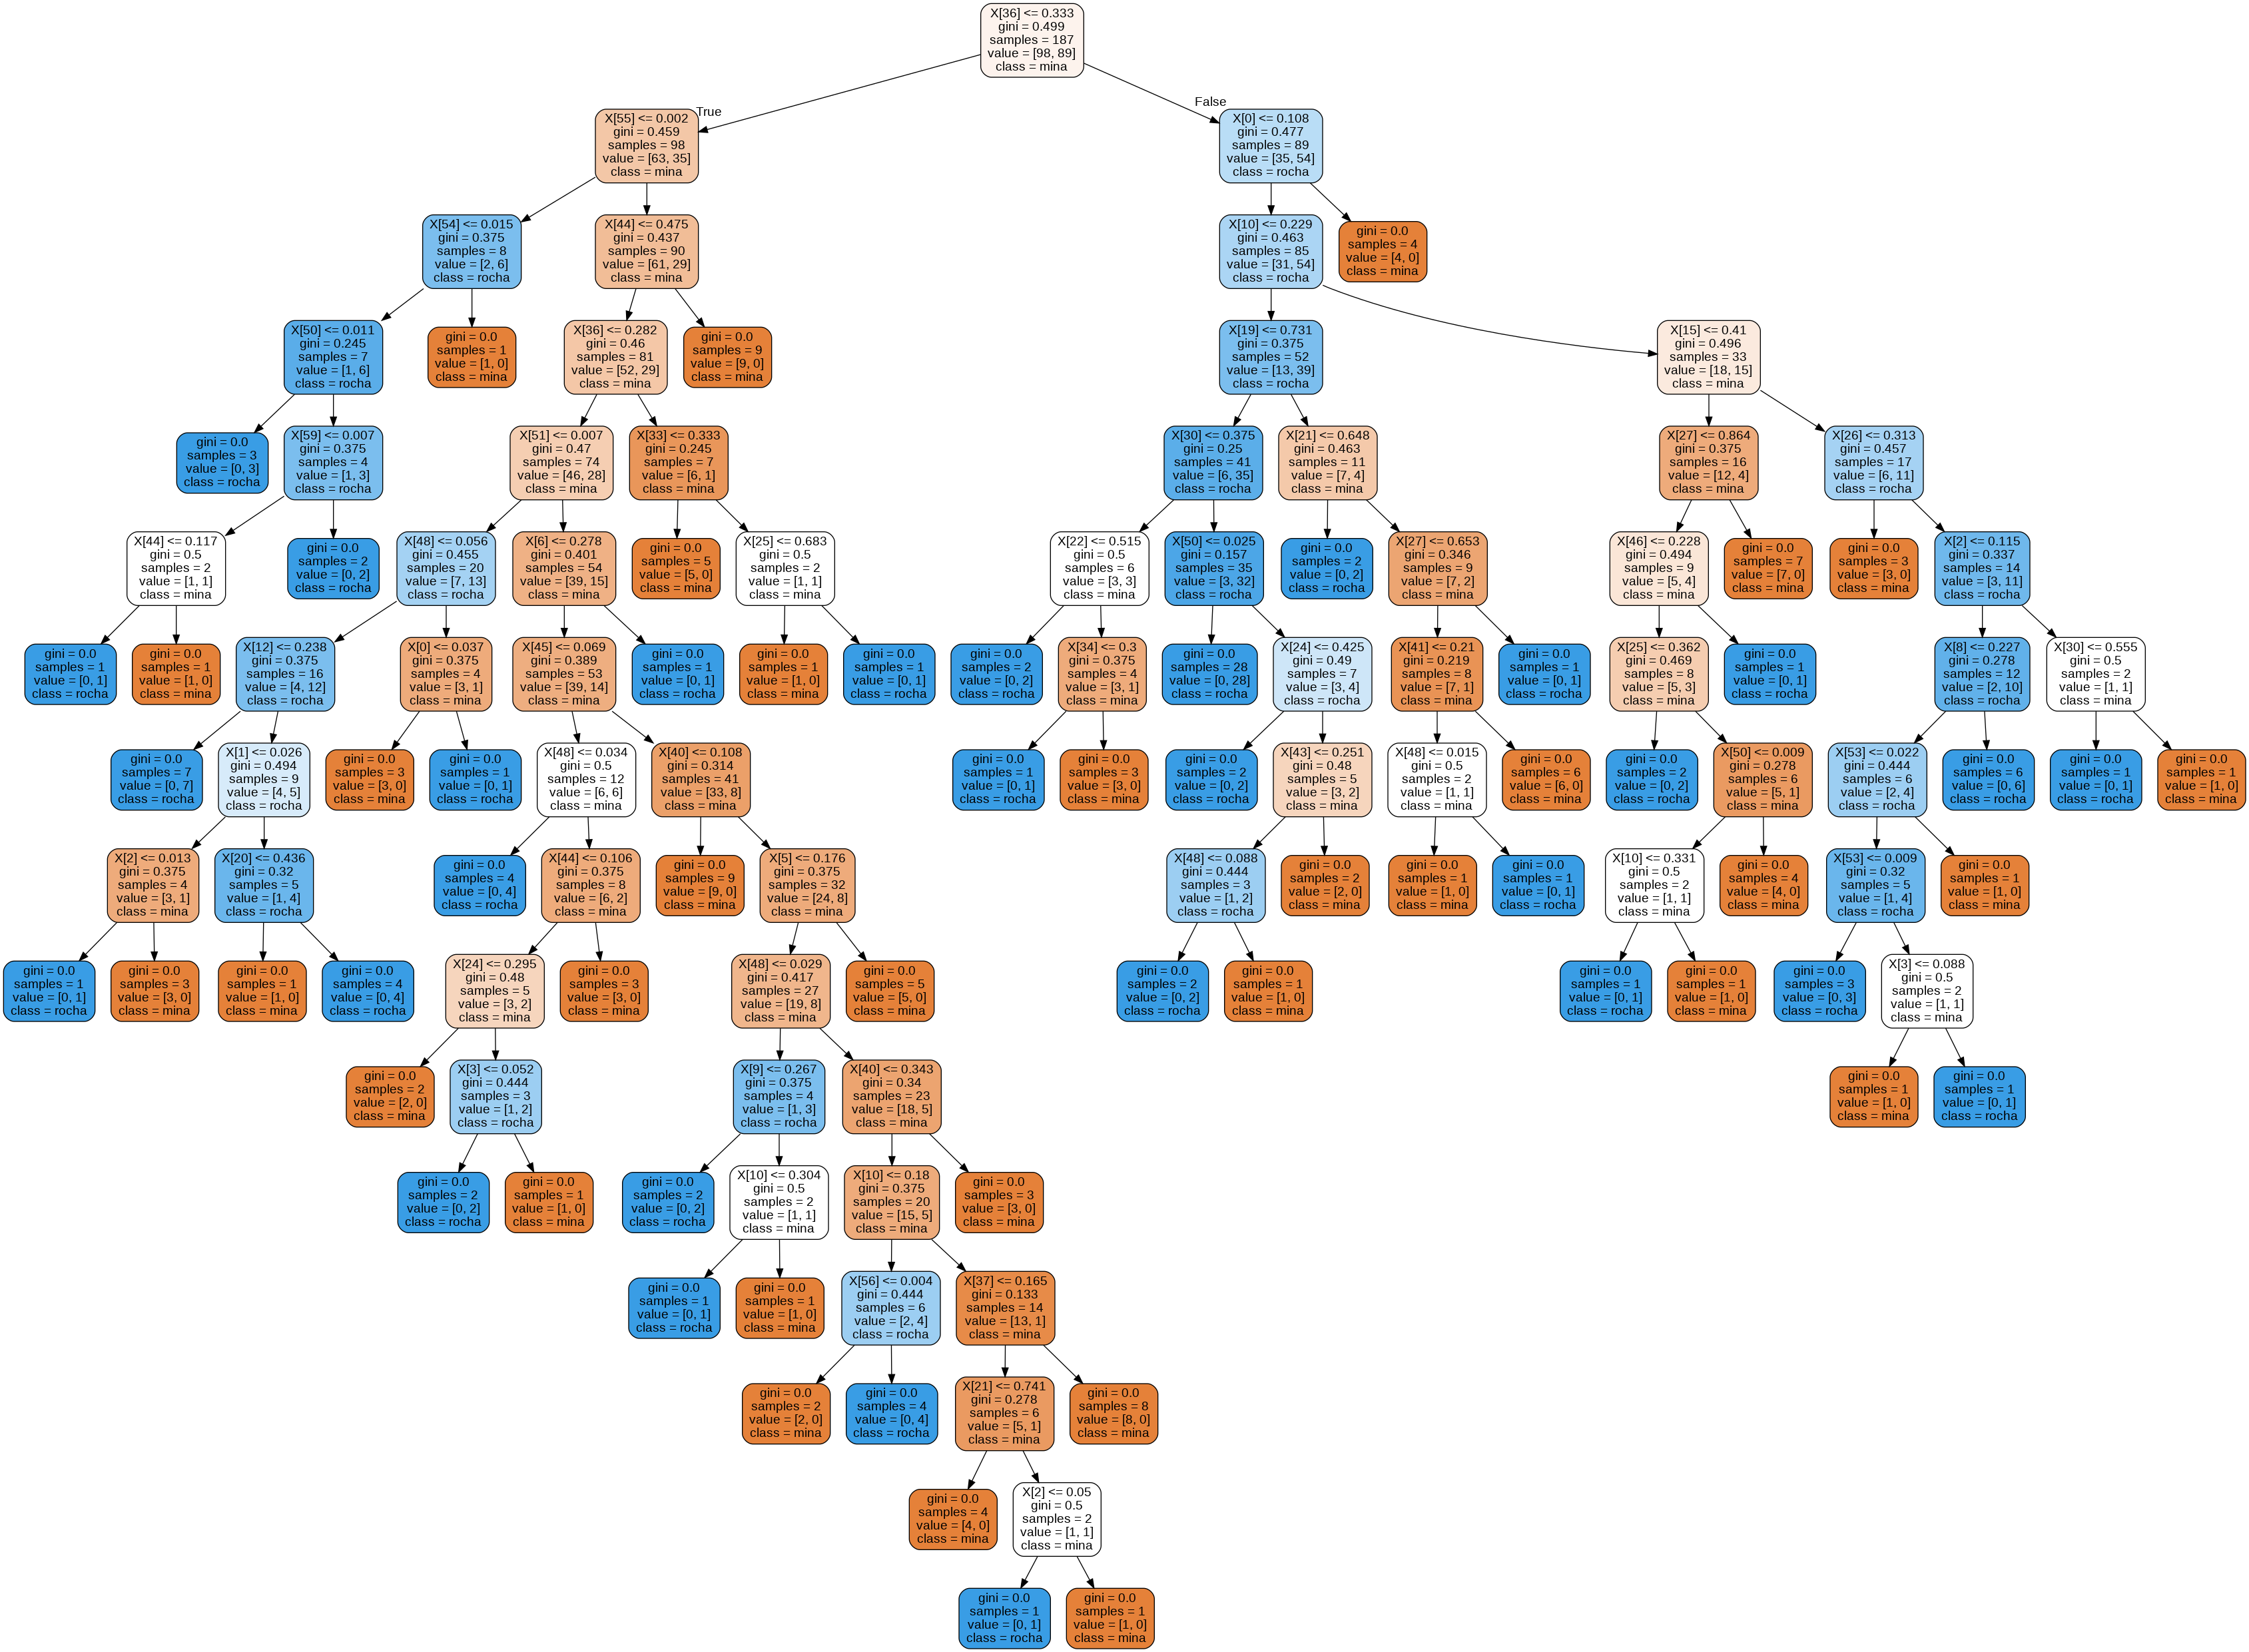

In [10]:
dot_data = tree.export_graphviz(extreeClass.estimators_[9], out_file=None, 
                                proportion = False,
                                rounded =True,
                                filled=True,
                                class_names = ['mina','rocha'])

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

###### UTILIZANDO O ADABOOST


In [11]:
# Adaboost com árvores mínimas
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=5)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("Classificador AdaBoost:\n AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm=\"SAMME\", n_estimators=20)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Classificador AdaBoost:
 AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=20)

--------------------------------------
Acurácia da base de treinamento: 0.94
--------------------------------------
              precision    recall  f1-score   support

        Mina       1.00      0.69      0.82        13
       Rocha       0.67      1.00      0.80         8

    accuracy                           0.81        21
   macro avg       0.83      0.85      0.81        21
weighted avg       0.87      0.81      0.81        21

       Mina(prev)  Rocha(prev)
Mina            9            4
Rocha           0            8


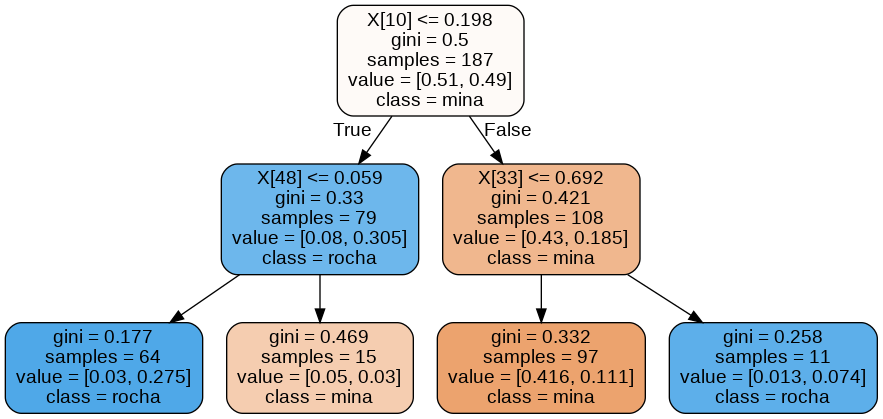

In [12]:
dot_data = tree.export_graphviz(ada.estimators_[1], out_file=None, 
                                proportion = False,
                                rounded =True,
                                filled=True,
                                class_names = ['mina','rocha'])

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

### REDES NEURAIS - MLP COM UMA CAMADA OCULTA

In [13]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[31], learning_rate_init=0.01, max_iter=200000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


print("Camadas da rede: {}".format(mlp.n_layers_))
print("Neurônios na camada oculta: {}".format(mlp.hidden_layer_sizes))
print("Neurônios na camada de saída: {}".format(mlp.n_outputs_))
print("Pesos na camada de entrada: {}".format(mlp.coefs_[0].shape))
print("Pesos na camada oculta: {}".format(mlp.coefs_[1].shape))

print("Acurácia da base de treinamento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Acurácia da base de teste: {:.2f}".format(mlp.score(X_test, y_test)))


print(classification_report(y_test, y_pred, target_names=class_names))

# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Camadas da rede: 3
Neurônios na camada oculta: [31]
Neurônios na camada de saída: 1
Pesos na camada de entrada: (60, 31)
Pesos na camada oculta: (31, 1)
Acurácia da base de treinamento: 1.00
Acurácia da base de teste: 0.95
              precision    recall  f1-score   support

        Mina       0.93      1.00      0.96        13
       Rocha       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21

[[13  0]
 [ 1  7]]


###### MLP COM DUAS CAMADA OCULTAS

In [15]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[100, 50])
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)


print("Camadas da rede: {}".format(mlp.n_layers_))
print("Neurônios na camada oculta: {}".format(mlp.hidden_layer_sizes))
print("Neurônios na camada de saída: {}".format(mlp.n_outputs_))
print("Pesos na camada de entrada: {}".format(mlp.coefs_[0].shape))
print("Pesos na camada oculta: {}".format(mlp.coefs_[1].shape))

print("Acurácia da base de treinamento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Acurácia da base de teste: {:.2f}".format(mlp.score(X_test, y_test)))

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Camadas da rede: 4
Neurônios na camada oculta: [100, 50]
Neurônios na camada de saída: 1
Pesos na camada de entrada: (60, 100)
Pesos na camada oculta: (100, 50)
Acurácia da base de treinamento: 1.00
Acurácia da base de teste: 0.86
              precision    recall  f1-score   support

        Mina       0.86      0.92      0.89        13
       Rocha       0.86      0.75      0.80         8

    accuracy                           0.86        21
   macro avg       0.86      0.84      0.84        21
weighted avg       0.86      0.86      0.86        21

       Mina(prev)  Rocha(prev)
Mina           12            1
Rocha           2            6


In [16]:
mean_on_train = X.mean(axis=0)
std_on_train = X.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[31], random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Acurácia da base de treinamento: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Acurácia da base de teste: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

y_pred = mlp.predict(X_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

mlp = MLPClassifier(solver='adam', hidden_layer_sizes=[31], max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Acurácia da base de treinamento: {:.2f}".format(mlp.score(X_train_scaled, y_train)))
print("Acurácia da base de teste: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

y_pred = mlp.predict(X_test_scaled)

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)


Acurácia da base de treinamento: 1.00
Acurácia da base de teste: 0.95
       Mina(prev)  Rocha(prev)
Mina           12            1
Rocha           0            8
Acurácia da base de treinamento: 1.00
Acurácia da base de teste: 0.95
       Mina(prev)  Rocha(prev)
Mina           12            1
Rocha           0            8


In [27]:
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
print(vmin, vmax)

-0.5891241358367041 0.5636389013327482


In [17]:
mlpgs = MLPClassifier(max_iter=200000, random_state=0)
params={'solver':('adam', 'lbfgs'), 
        'hidden_layer_sizes':[27, 29, 31, 33, 35, 37], 
        'learning_rate_init':[0.1, 0.05, 0.01, 0.005, 0.001]}

classificadorGrid = GridSearchCV(mlpgs, param_grid=params)


y_pred = classificadorGrid.fit(X, y).predict(X_test)

print("Os melhores parâmetros encontrados no conjunto de modelos testados:")
print(classificadorGrid.best_params_,'\n')

print(classification_report(y_test, y_pred, target_names=['Mina', 'Rocha']))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Os melhores parâmetros encontrados no conjunto de modelos testados:
{'hidden_layer_sizes': 31, 'learning_rate_init': 0.005, 'solver': 'adam'} 

              precision    recall  f1-score   support

        Mina       0.81      1.00      0.90        13
       Rocha       1.00      0.62      0.77         8

    accuracy                           0.86        21
   macro avg       0.91      0.81      0.83        21
weighted avg       0.88      0.86      0.85        21

       Mina(prev)  Rocha(prev)
Mina           13            0
Rocha           3            5


In [18]:
mlp.predict_proba(X_test_scaled)


array([[9.99668648e-01, 3.31351647e-04],
       [8.62470428e-04, 9.99137530e-01],
       [1.73767620e-01, 8.26232380e-01],
       [1.51542251e-03, 9.98484577e-01],
       [9.95360705e-01, 4.63929525e-03],
       [4.05617100e-02, 9.59438290e-01],
       [7.57030260e-01, 2.42969740e-01],
       [9.78638950e-01, 2.13610495e-02],
       [1.09511944e-04, 9.99890488e-01],
       [9.65560303e-01, 3.44396974e-02],
       [9.88003710e-01, 1.19962900e-02],
       [4.13901478e-03, 9.95860985e-01],
       [6.03233160e-01, 3.96766840e-01],
       [9.99983140e-01, 1.68596280e-05],
       [8.93501174e-01, 1.06498826e-01],
       [9.96654496e-01, 3.34550363e-03],
       [3.90436536e-01, 6.09563464e-01],
       [9.73997383e-01, 2.60026173e-02],
       [2.69571883e-01, 7.30428117e-01],
       [5.24060226e-02, 9.47593977e-01],
       [9.43010269e-01, 5.69897310e-02]])

### Questões a Resolver

1. Descreva a topologia da rede que foi treinada. Compare o conjunto de regras da árvore de decisão com os modelos previstos pelo AdaBoost.

Os modelos MPL foram criados uma topologia lógica, devido ao formato de nossa base, nos permitindo assim alterar os parâmetros dinamicamente. 

A árvore tradicional é limitada a apenas uma única estrutura de árvore, onde seu ajuste de poda, melhora sua capacidade de acurácia e ajuda a evitar overfitting.

O uso de outros tipos de árvores nos ajudam a perceber que, mesmo com o pruning apenas, nós temos uma baixa taxa de acerto nos testes. A capacidade de gerar várias árvores e ir melhorando os pesos dos atributos, faz com que acertamos mais em dados que nosso modelo não está "vendo".

Quando aplicado o AdaBoost, nossa capacidade de geração de árvores e ajuste conforme os pesos vão mudando, nos permite explorar um universo de possibilidades, porém se nossa árvore for muito profunda ou tivermos um numero muito grande de gerações aleatorias, podemos estar comprometendo nosso poder de boosting.

2. Verifique e compare a matriz de confusão e as medidas de performance: acurácia, precisão e revocação, de cada modelo.

Considerando todos os modelos aplicado, vemos que quando utilizado as "arvores extras" temos um resultado melhor pois são gerações de arvores aleatorias "controladas", permitindo um tunning automatizado quase como uma evolução dos algoritmos anteriores (RandomForest e Árvore de Decisão).

Comparando com os MLP o poder da rede neural em uma base que tem atributos apenas numéricos, seus calculos lineares permitem que suas taxas de acertos fiquem disparadamente, as maiores em relação aos outros modelos. 

Por fim, o AdaBoost, melhorando a performance das arvores, com uma premissa de simplificar ao maximo as arvores e gerar um número satisfatorio de exemplares, podemos atingir taxas muito boas e se ajustarmos os hiperparametros um pouco mais, atingimos, no caso desta BASE, uma acuracia de 100%.

3. Analise a interpretabilidade dos modelos. Altere as opções de prunning e preprunning no AdaBoost para criar árvores mais simples, mas que tenham igual poder de previsão.

Após a alteração dos parametros AdaBoost, conseguimos gerar arvores muito pquenas com resultados incríveis. 
Efetivado o teste com 10 arvores, chegamos a um resultado de 100%. 



### Conclusão

A Ramdom Forest por ser algo muito aleatório, pode não ser tão interessante. Utilizando as arvores extras, chegamos a um resultado melhor que em apenas uma arvore.

E mesmo com um afiação fina das redes neurais, no modelo aplicado, ainda assim não chegamos a um resultado possível com o AdaBoost e mesmo com as arvores extras.